@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/b920s9nXGao

<h1>
    <span style="color:purple">Métricas para Clusters</span> 
</h1>
<h1 style="color:pink">Librerías, Contexto y Datos</h1>

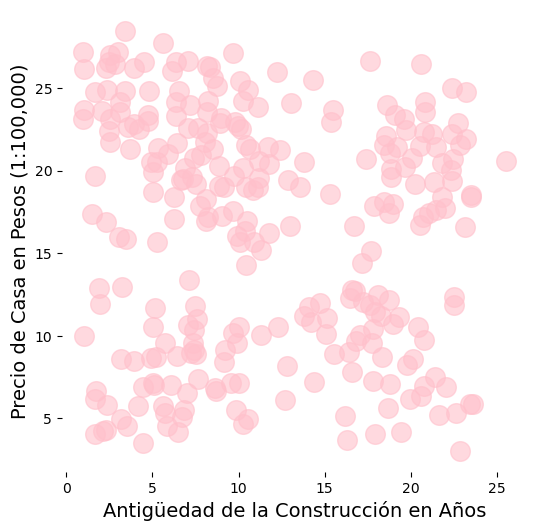

In [1]:
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt


# Cargar datos
datos = np.loadtxt("propiedades.csv", delimiter=",")

# Graficar datos
plt.figure(figsize=(6, 6))
plt.scatter(datos[:, 0], datos[:, 1], c="pink", s=200, alpha=0.6)
plt.xlabel("Antigüedad de la Construcción en Años", fontsize=14)
plt.ylabel("Precio de Casa en Pesos (1:100,000)", fontsize=14)
plt.box(False)
plt.show()

<h2 style="color:purple">Métricas: K-Means vs Propagación de Afinidad</h2>

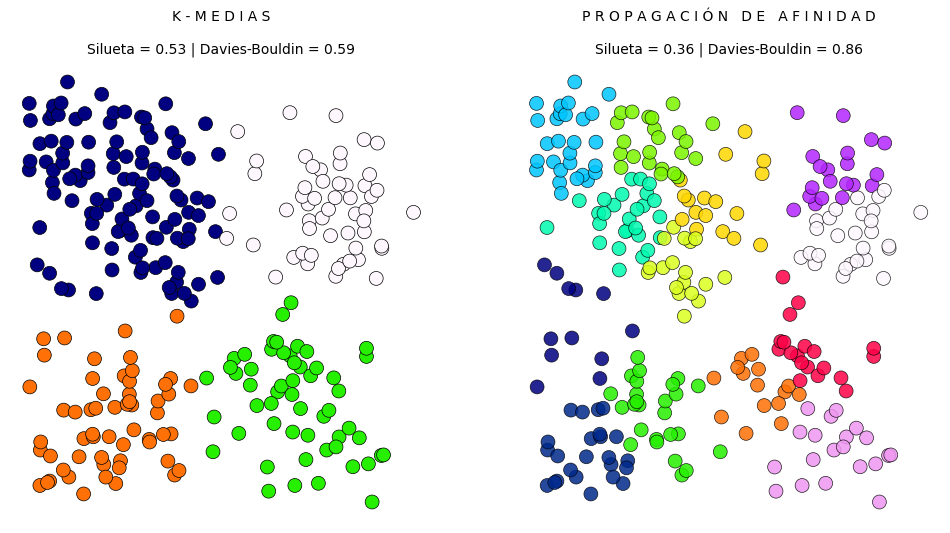

In [2]:
# silhouette_score -> entre más alto mejor
# davies_bouldin_score -> entre más bajo mejor

# Clusters con el algoritmo K-Means (K-medias) 
clusters_km = KMeans(n_clusters=4, random_state=1)
clusters_km.fit_predict(datos)

# Cálculo de métricas para K-Means
silueta_km = silhouette_score(datos, clusters_km.labels_)
davies_bouldin_km = davies_bouldin_score(datos, clusters_km.labels_)

# Clusters con el algoritmo de Propagación de Afinidad
clusters_ap = AffinityPropagation(random_state=1)
clusters_ap.fit_predict(datos)

# Cálculo de métricas para Propagación de Afinidad
silueta_ap = silhouette_score(datos, clusters_ap.labels_)
davies_bouldin_ap = davies_bouldin_score(datos, clusters_ap.labels_)

# Graficando los resultados 
fig = plt.figure(figsize=(12, 6))
plt.set_cmap("gist_ncar")

# Gráfica de clusters con K-Means
ax = fig.add_subplot(1, 2, 1)
ax.scatter(datos[clusters_km.labels_>=0][:, 0], datos[clusters_km.labels_>=0][:, 1], 
           c=clusters_km.labels_[clusters_km.labels_>=0], s=100, 
           linewidth=0.5, edgecolors="black")
ax.set_title("K - M E D I A S\n\nSilueta = %.2f | Davies-Bouldin = %.2f" %
             (silueta_km, davies_bouldin_km), fontsize=10)
ax.axis("off")

# Gráfica de clusters con Propagación de Afinidad
ax = fig.add_subplot(1, 2, 2)
ax.scatter(datos[clusters_ap.labels_>=0][:, 0], datos[clusters_ap.labels_>=0][:, 1], 
           c=clusters_ap.labels_[clusters_ap.labels_>=0], s=100, 
           linewidth=0.5, edgecolors="black", alpha=0.85)
ax.set_title("P R O P A G A C I Ó N   D E   A F I N I D A D\n\nSilueta = %.2f | Davies-Bouldin = %.2f" % 
             (silueta_ap, davies_bouldin_ap), fontsize=10)
ax.axis("off")
    
plt.show()

<h2 style="color:purple">Clusters con K-Means para diferentes valores de K</h2>

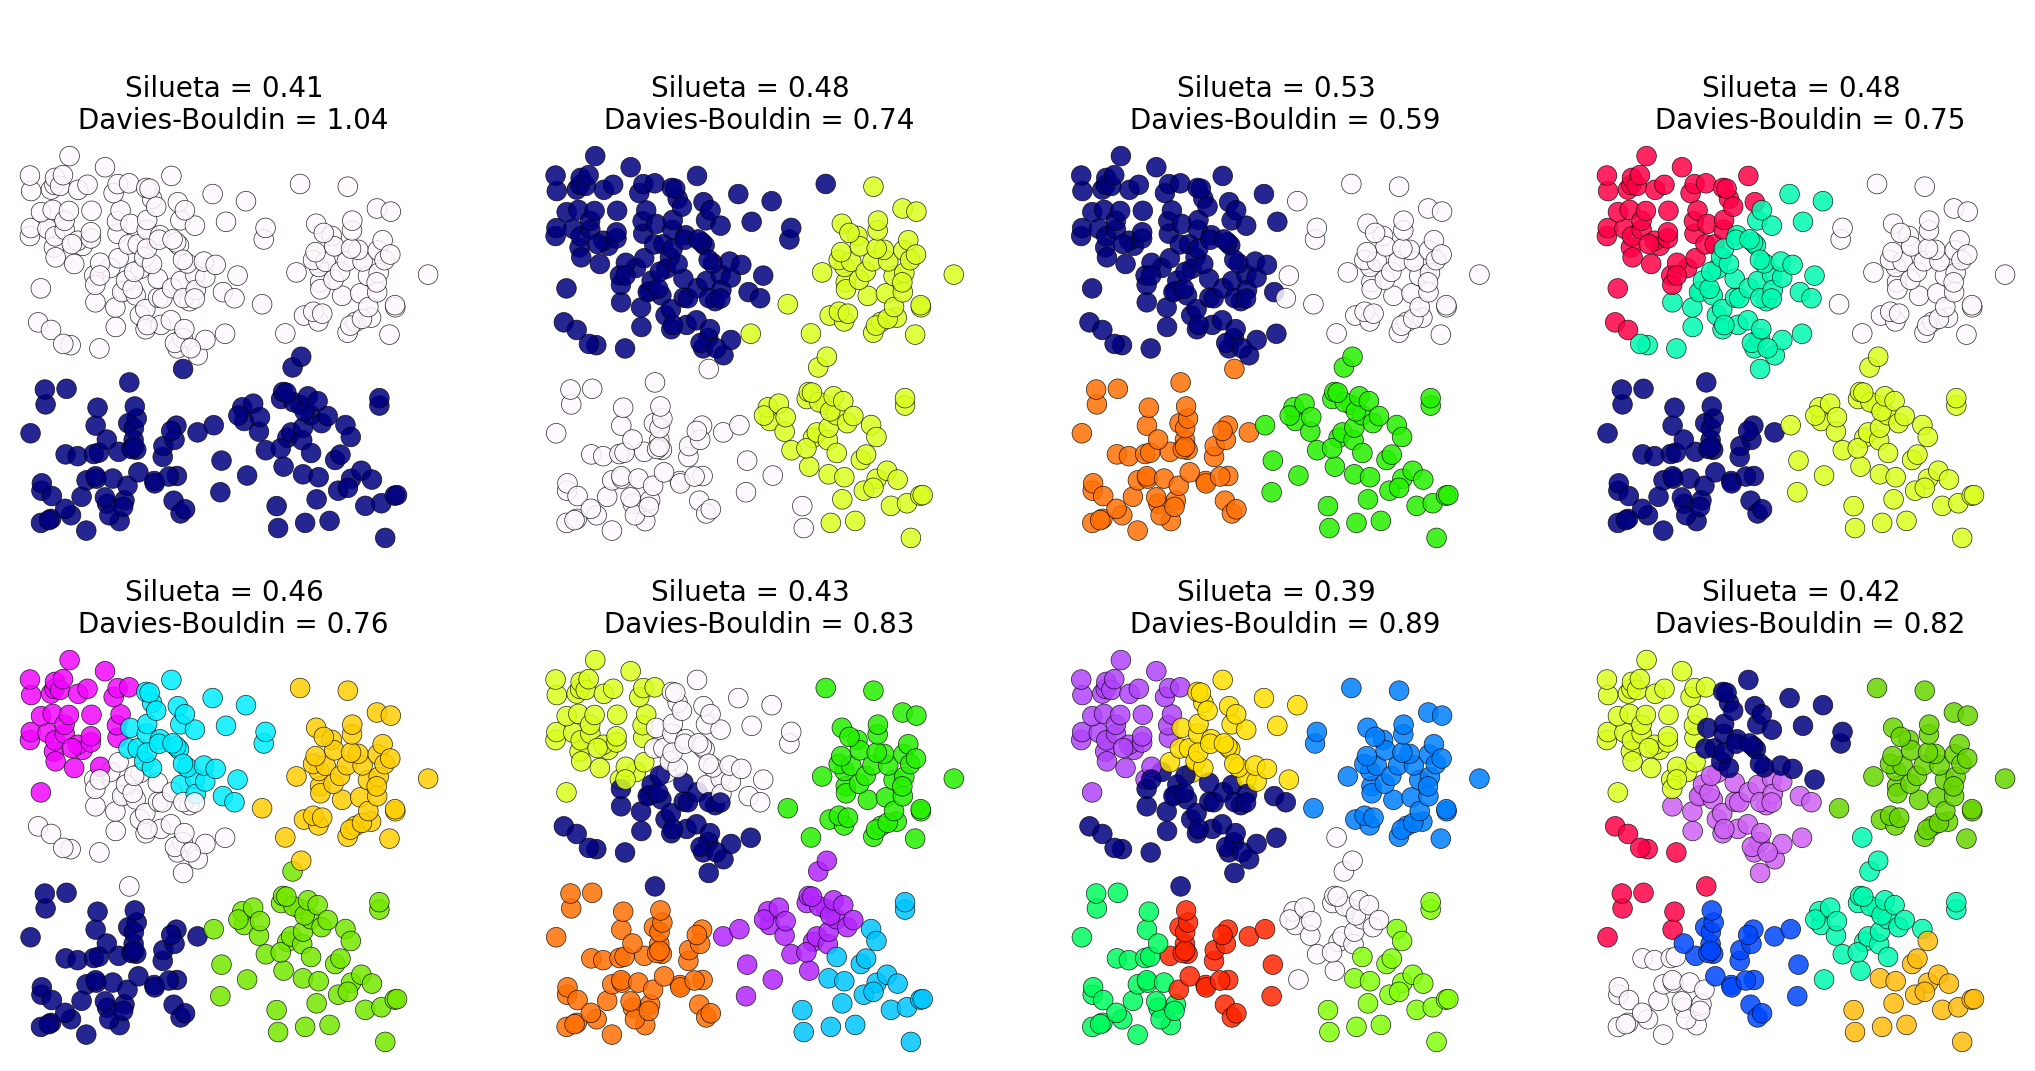

In [3]:
fig = plt.figure(figsize=(26, 12))

for k in range(2, 10):
    # Creación de clusters
    clusters = KMeans(n_clusters=k, random_state=1)
    clusters.fit_predict(datos)
    # Cálculo de métricas 
    silueta = silhouette_score(datos, clusters.labels_)
    davies_bouldin = davies_bouldin_score(datos, clusters.labels_)
    # Graficando clusters
    ax = fig.add_subplot(2, 4, k-1)
    ax.scatter(datos[clusters.labels_>=0][:, 0], datos[clusters.labels_>=0][:, 1], 
               c=clusters.labels_[clusters.labels_>=0], s=200, 
               linewidth=0.5, edgecolors="black", alpha=0.85)
    ax.set_title("\n\nSilueta = %.2f \n Davies-Bouldin = %.2f" % 
                 (silueta, davies_bouldin), fontsize=20)
    ax.axis("off")
    
plt.show()